
## Code the Euler Solvers

Implement both the simple and improved Euler solver in Julia. Code them, so that their input arguments are the rhs of the differential equation, parameters of the rhs and initial conditions.


In [15]:
using Plots, DifferentialEquations

In [7]:
simple_euler(f, x, Δt) = x + f(x) * Δt

function improved_euler(f, x, Δt)
    x̃ = simple_euler(f, x, Δt)
    return x + 0.5 * (f(x) + f(x̃)) * Δt
end

improved_euler (generic function with 1 method)


## Test Your Solvers with the Lotka-Volterra System

Now, test your solvers by integrating the Lotka-Volterra system (LV), modelling predetator-prey dynamics. In this model the prey, here hares, have unlimited food supply but are hunted by predators, here foxes. The predators only hunt the prey, and otherwise die if no prey is available. When H
is the amount of hares, and F

is the amount of foxes, then their population dynamics are described by

dH/dt=αH−βHF

dF/dt=−γF+δHF

All parameters are positive, real numbers.

What could the four different terms in the LV stand for?

Integrate the LV from t0=0

to tend=50 with α=1, β=0.5, γ=1., δ=0.2 and x0=[20.,5.]

Test both solvers for different step sizes Δt=0.01
, Δt=0.05, Δt=0.1. What are you observing?

Looking at the trajectories you get, can you think of one major short coming of the model? Where is it the most unrealistic?

In the end, make sure you commit and push all files you were working on to your Git repository

Tips

The initial conditions (like the states) need to be floating numbers, not integer, so intialize them as floats (e.g. [20., 20.] instead of [20, 20]), otherwise you might run into errors


In [12]:
const α, β, γ, δ = 1, 0.5, 1., 0.2
function lotka_volterra(x)
    dx = similar(x)
    H, F = x

    dH = α*H - β*H*F
    dF = -γ*F + δ*H*F

    return [dH, dF]
end

lotka_volterra (generic function with 1 method)

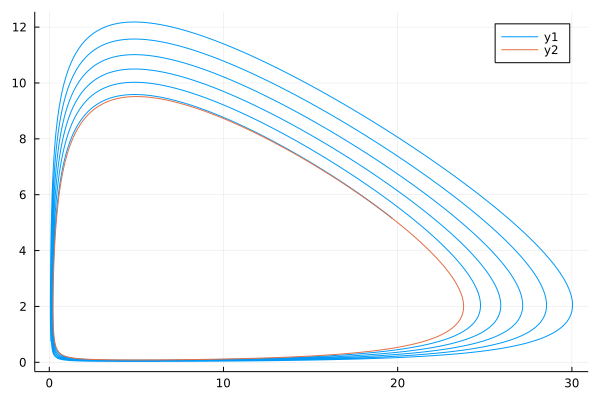

In [13]:
t0, Δt, tend = 0., 0.01, 50.
ts = t0:Δt:tend
x0 = [20., 5.]

xs_euler = Matrix{Float64}(undef, 2, length(ts))
xs_euler[:, 1] .= simple_euler(lotka_volterra, x0, Δt)

xs_improved_euler = Matrix{Float64}(undef, 2, length(ts))
xs_improved_euler[:, 1] .= improved_euler(lotka_volterra, x0, Δt)

for i in 2:length(ts)
    xs_euler[:, i] .= simple_euler(lotka_volterra, xs_euler[:, i-1], Δt)
    xs_improved_euler[:, i] .= improved_euler(lotka_volterra, xs_improved_euler[:, i-1], Δt)
end

p = plot(xs_euler[1, :], xs_euler[2, :])
p = plot!(xs_improved_euler[1, :], xs_improved_euler[2, :])


## DifferentialEquations.jl

Similar to the notes in the lecture, integrate the Lotka Volterra system with DifferentialEquations.jl.
Try out different solvers like Tsit5(), Vern8(), Rosenbrock23() and plot their solution compared to the Euler solvers you implemented. For a system as "easy" as the LV, you will probably not see large differences in accuracy, but note and compare their different performance with @btime from BenchmarkTools.jl. Also experiment with how the adaptive stepsize tolerances like reltol (default: 10−3) and abstol (default: 10−6) influence the performance of the solver

* Tsit5() is one of the default solvers of DifferentialEquations.jl, it is a Runge-Kutta solver with 5th-order accuracy and adaptive stepsize. It's a good default choice
* Vern8() is also a adaptive stepsize Runge-Kutta solver, but with 8th-order accuracy. Thus it is more accurate but slower than the Tsit5()
* Rosenbrock23() is a different kind of solver. It is an implicit solver that is different to the explicit Runge-Kutta and Euler solvers we talked about. It is setup to deal with "stiff" ODEs. Stiff ODEs are numerically harder to solve. They occur e.g. when there is a large difference in scale between the different dimensions of a system/model. They can also solve non-stiff ODEs, but generally they are slower than the explicit solvers for these cases (for a similar accuracy).


In [16]:
function lotka_volterra!(du, u, p, t)
    α, β, γ, δ = p
    H, F = u

    du[1] = α*H - β*H*F
    du[2] = -γ*F + δ*H*F
    return du
end

lotka_volterra! (generic function with 1 method)

In [19]:
pa = [α, β, γ, δ]
prob = ODEProblem(lotka_volterra!, x0, (t0,tend), pa)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 104-element Vector{Float64}:
  0.0
  0.0749798704409577
  0.1744449892268345
  0.28552935858613054
  0.4201745809083922
  0.6019716806709777
  0.7633533612827603
  0.9596608376309241
  1.18263196748818
  1.5254928941325505
  1.8017386183672857
  2.176239548844706
  2.580768992789399
  ⋮
 44.401136702002184
 44.61963877333324
 44.90288724233323
 45.27571855444014
 45.60012121028204
 46.018633831855176
 46.48753252902226
 47.11963039486091
 47.729111025322915
 48.45325572243769
 49.30523289474309
 50.0
u: 104-element Vector{Vector{Float64}}:
 [20.0, 5.0]
 [17.493410525388875, 6.1482927868145785]
 [13.717393265344798, 7.595015956840958]
 [9.695974710481252, 8.80542925266585]
 [5.966822463595557, 9.472051868679712]
 [3.0337921663169034, 9.24377973796915]
 [1.7405440626668258, 8.476630062040106]
 [0.9743271717621946, 7.332940676740733]
 [0.577599631203082

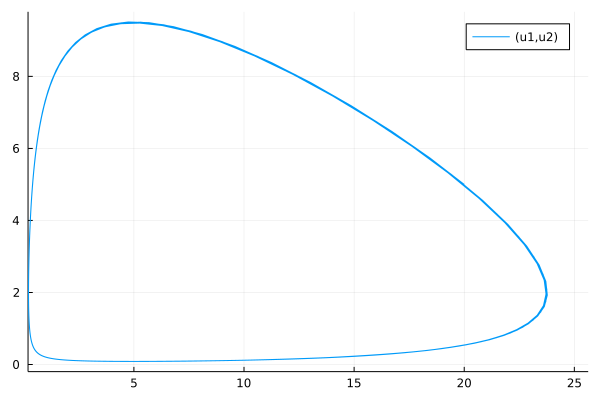

In [21]:
plot(sol, idxs=(1,2))